# 군AI교육지원사업

## WEEK4 - Fourth class

### Activation Functions

In [ ]:
import torch
import seaborn as sns

sns.distplot(torch.randn(512))

In [ ]:
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.relu = nn.ReLU() # activation function

	def forward(self, x):
		out = self.relu(self.dense(x))
		return out


class OurModel(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(OurModel, self).__init__()
        self.linear1 = DenseBlock(in_dim, hidden_dim)
        self.linear2 = DenseBlock(hidden_dim, out_dim)

    def forward(self, x):
        out = self.linear1(x)
        out = self.linear2(out)
        return out

In [ ]:
x = torch.randn(16, 128)
model = OurModel(in_dim=128, hidden_dim=64, out_dim=1)
y = model(x)
print(y)
print(y.shape)

In [ ]:
import torch.nn.functional as F

class OurModel(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(OurModel, self).__init__()
        self.linear1 = nn.Linear(in_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, out_dim)

    def forward(self, x):
        out = F.relu(self.linear1(x)) # activation
        out = F.relu(self.linear2(out)) # activation
        return out

In [ ]:
x = torch.randn(16, 128)
model = OurModel(in_dim=128, hidden_dim=64, out_dim=1)
y = model(x)
print(y)
print(y.shape)

#### Sigmoid

ReLU가 등장하기 전에 널리 쓰이던 활성화함수다. 출력이 0과 1사이로 나와 층을 깊이 쌓으면 gradient vanising 문제가 있고 computational cost가 높다. 요새는 hidden layer에는 잘 사용하지 않고 binary classification을 위해 모델의 마지막 output에 적용하거나 아니면 gating mechanism에 활용되는 함수이다.

**값의 범위: [0, 1]

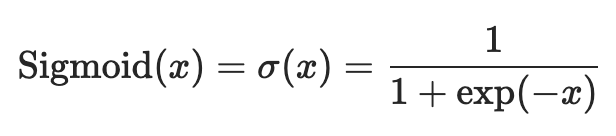

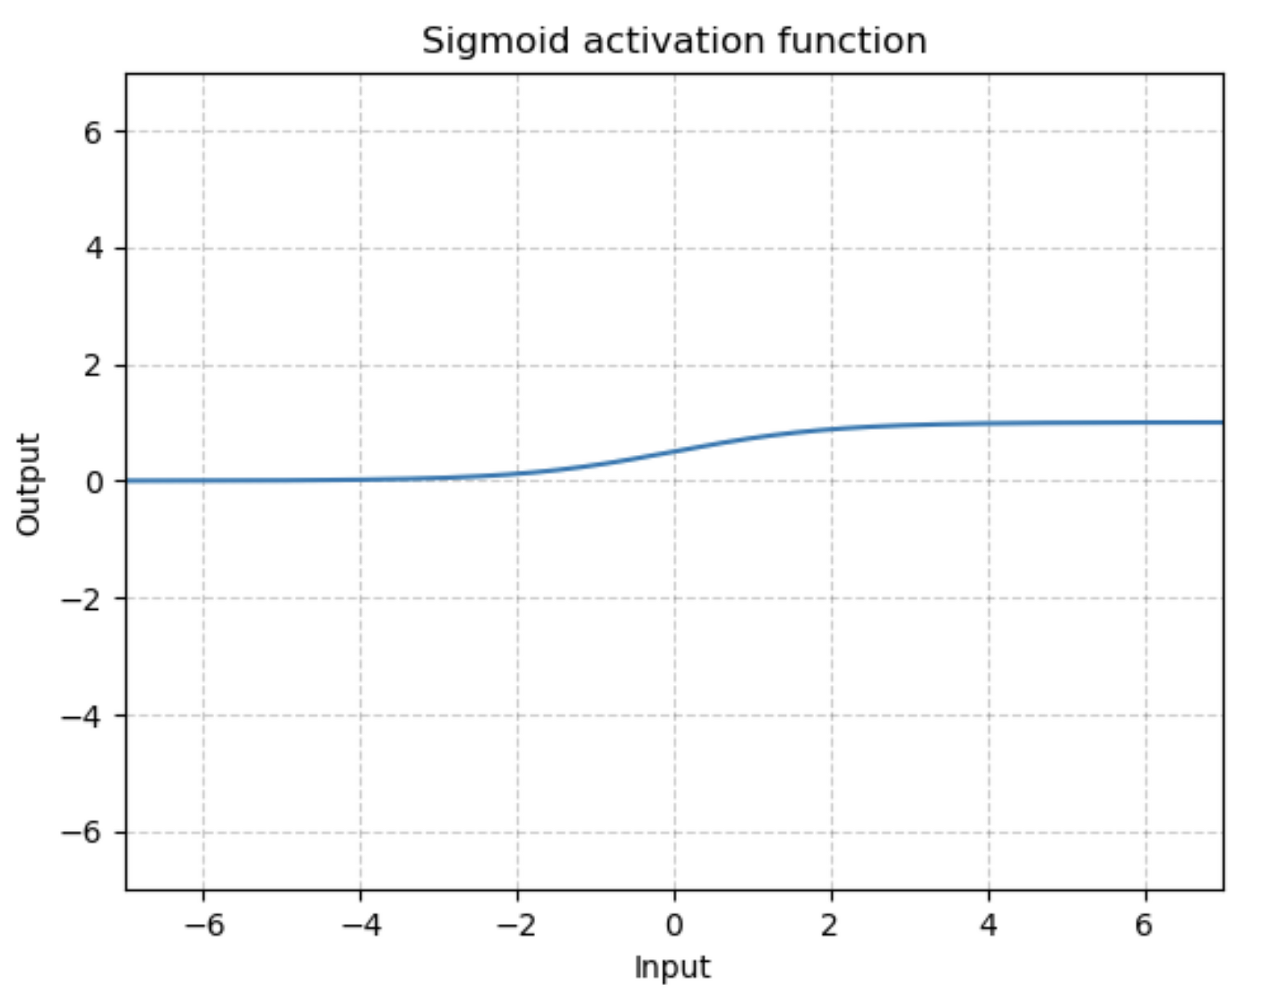

In [ ]:
class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Sigmoid() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

#### TanH (Hyperbolic tangent)

Tanh함수는 zero-centric함수로 sigmoid가 [0, 1]범위에서 [-1, 1]범위로 shift된 형태를 띈다. sigmoid보다 gradient값이 커 loss function을 더 빨리 minimize할 수 있다. 하지만 이 역시 gradient vanishing 문제가 있어 현재는 hidden layer의 activation function으로 잘 사용되지 않는다.

**값의 범위: [-1, 1]

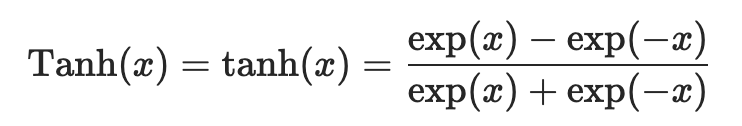

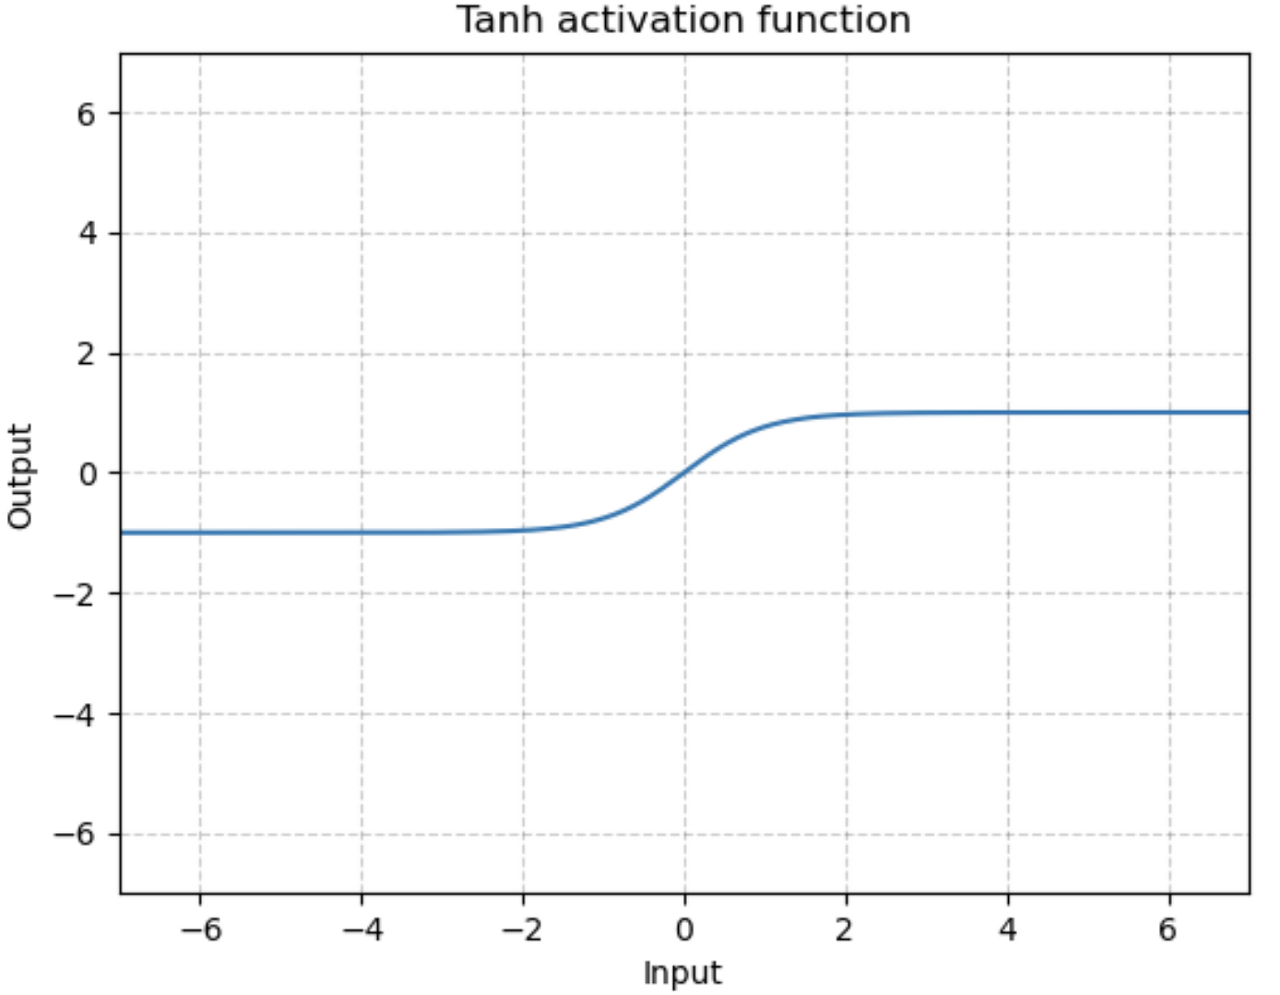

In [ ]:
class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Tanh() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

#### ReLU (Rectified Linear Unit)

ReLU는 현재 hidden layer의 activation function로 가장 많이 사용되는 함수이다. ReLU는 간단하고 계산이 효율적이라는 장점이 있다. (sigmoid, tanh보다 SGD에서 수렴속도가 6배 빠르다고 함) 또한 입력이 0보다 클 경우 입력이 그대로 나가기 때문에(unbounded above) gradient vanishing 문제에서도 이전 activation function보다 낫다. 그리고 원치 않는 노드를 꺼버리는 역할을 하기 때문에 효율적인 학습이 가능하다.

**값의 범위: [0, ∞]

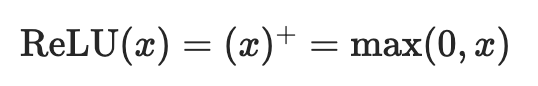

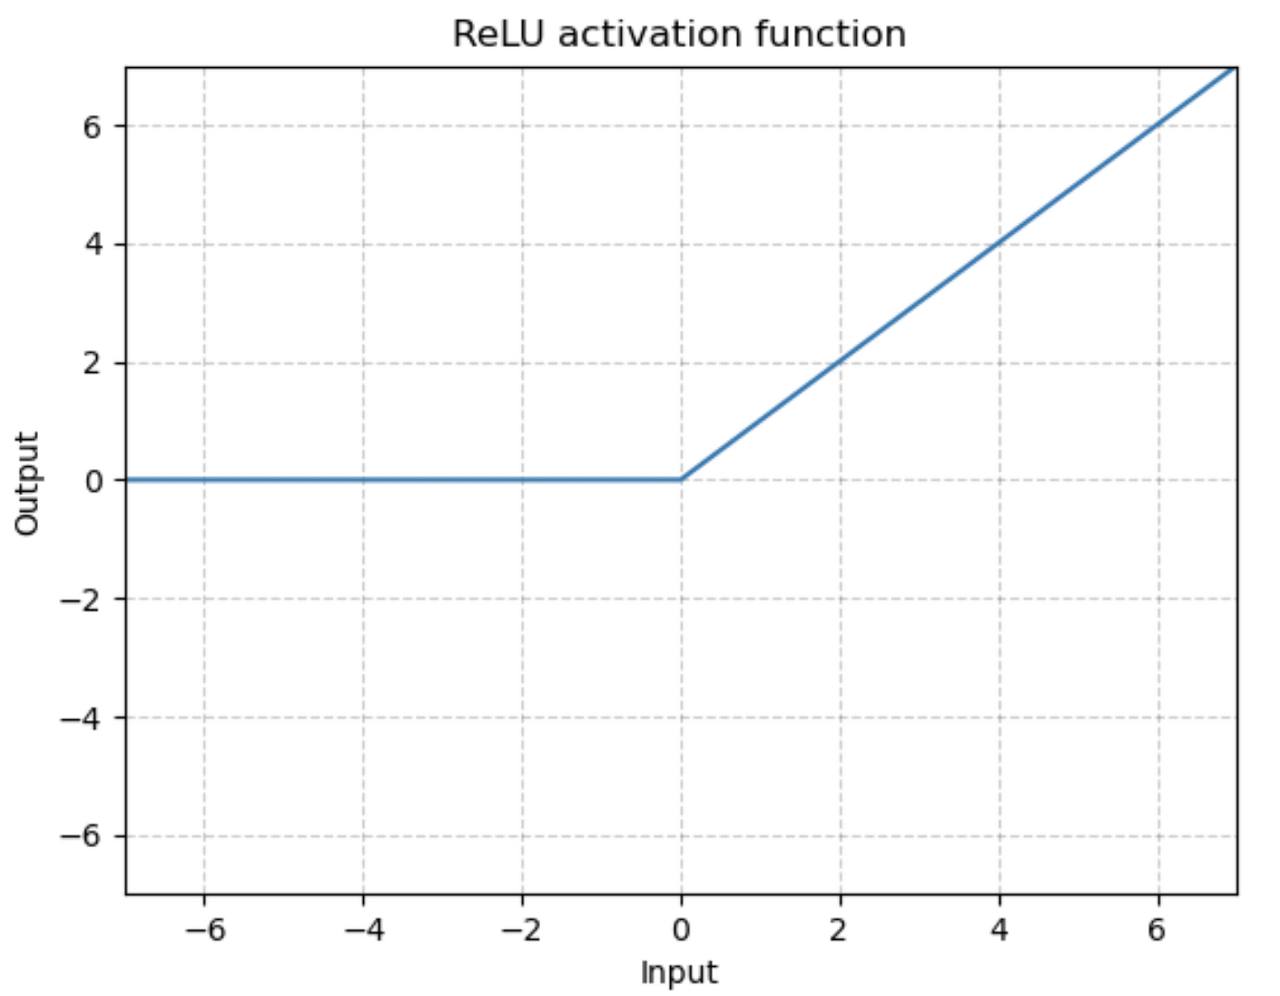

In [ ]:
class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.ReLU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

#### Softplus

SoftPlus함수는 아래의 식으로 정의된 activation function으로 도함수가 sigmoid라는 특징을 가지고 있다. sigmoid나 tanh와 다르게 unbounded above라는 특징이 있다.

**값의 범위: [0, ∞]

SoftPlus함수는 아래의 식으로 정의된 activation function으로 도함수가 sigmoid라는 특징을 가지고 있다. sigmoid나 tanh와 다르게 unbounded above라는 특징이 있다.

**값의 범위: [0, ∞]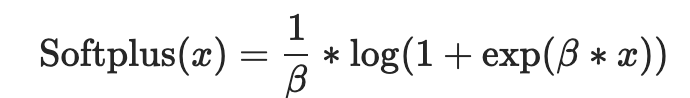

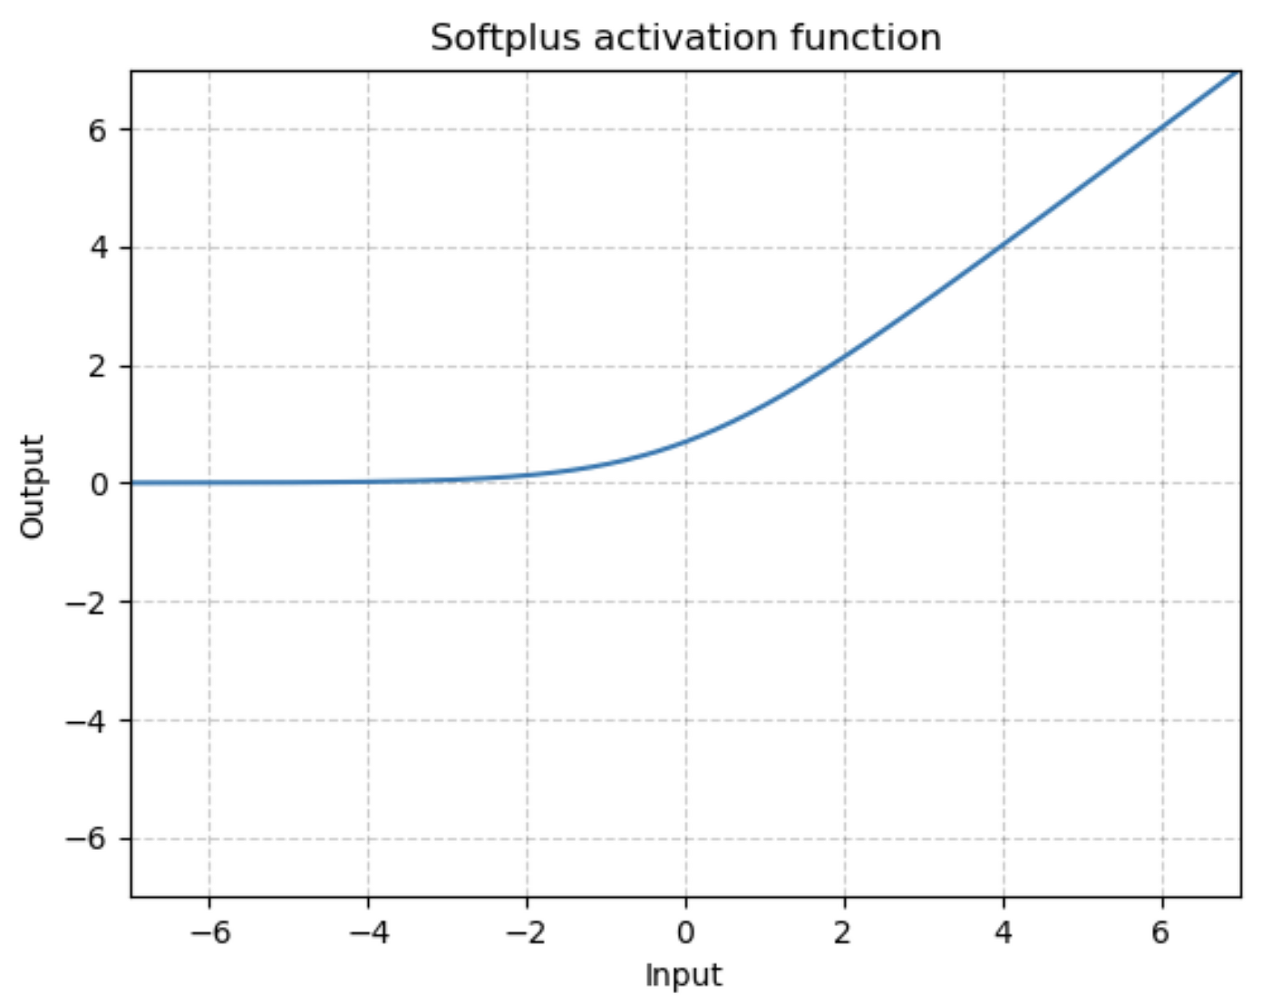

In [ ]:
class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Softplus() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

ReLU가 이전 activation function들보다 gradient vanishing 문제에서 자유롭지만 드물게 neural net 전역에서 노드가 모두 0이 되어버려 기울기를 0으로 만드는 현상을 발생시킬 수 있어 파라미터가 업데이트 되지 않는 현상을 야기할 수 있다. gradient vanishing을 극복하기 위해 음수정보를 가져가는 방식으로 ReLU의 변형들이 많이 등장하였다.

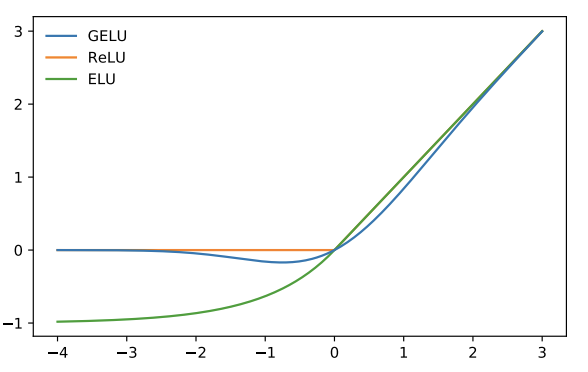

#### Leaky ReLU

Leaky ReLU는 ReLU가 0보다 작은 구간에서 아예 0이 되지 않게 하기 위해 아주 약한 음의 기울기를 주는 방식으로 ReLU의 단점을 보완하고자 하는 activation이다. 하지만 이 방법은 bounded below되어있지 않기 때문에 음수곱의 누적으로 feature가 잘 activation되지 않을 수도 있다는 단점과 ReLU 보다 연산이 복잡하다는 단점이 있다.

**값의 범위: [-∞, ∞]

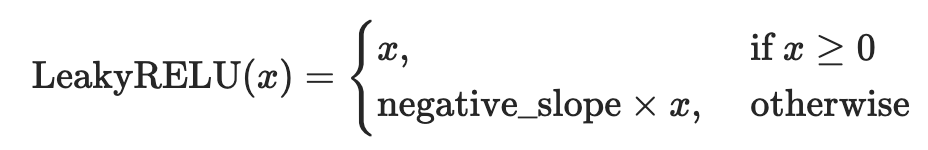

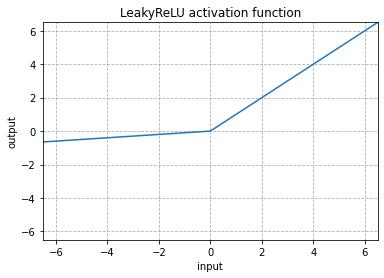

In [ ]:
class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.LeakyReLU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

#### PReLU

Leaky ReLU와 마찬가지로 0보다 작은 구간에서 아예 0이 되지 않게 하기 위해 아주 약한 음의 기울기를 주는 방식이다. 다만, Leaky ReLU와의 차이점은 학습 가능한 파라미터를 주어 적절하게 음수값이 되도록 한 것이다.

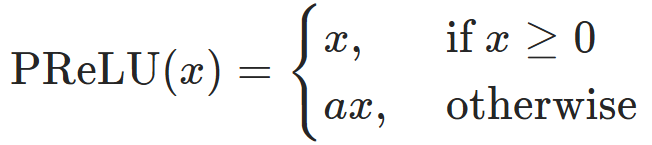

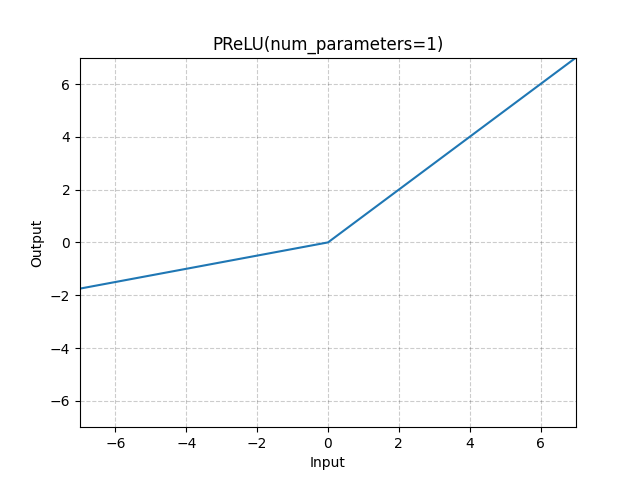

In [ ]:
class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.PReLU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

In [ ]:
model.act.weight

#### ELU

ELU는 ReLU가 음의 값에서 0이 되는 문제를 아래의 formulation으로 해결한다. ReLU가 구간별 선형성을 가지는 것과 달리 smooth한 곡선으로 미분이 가능하고 비선형성을 더 잘 모델링한다. ReLU, LeakyReLU보다 좋은 성능을 보인다고 저자가 실험을 통해 증명했다. α값이 고정되어있다는 단점이 있고 이후 더 좋은 activation이 많이 나왔다.

**값의 범위: [-α, ∞]

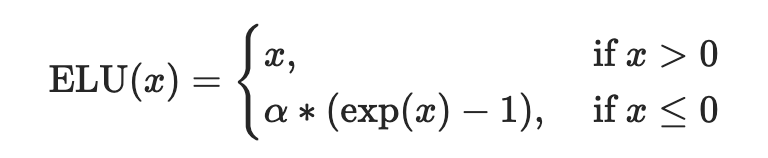

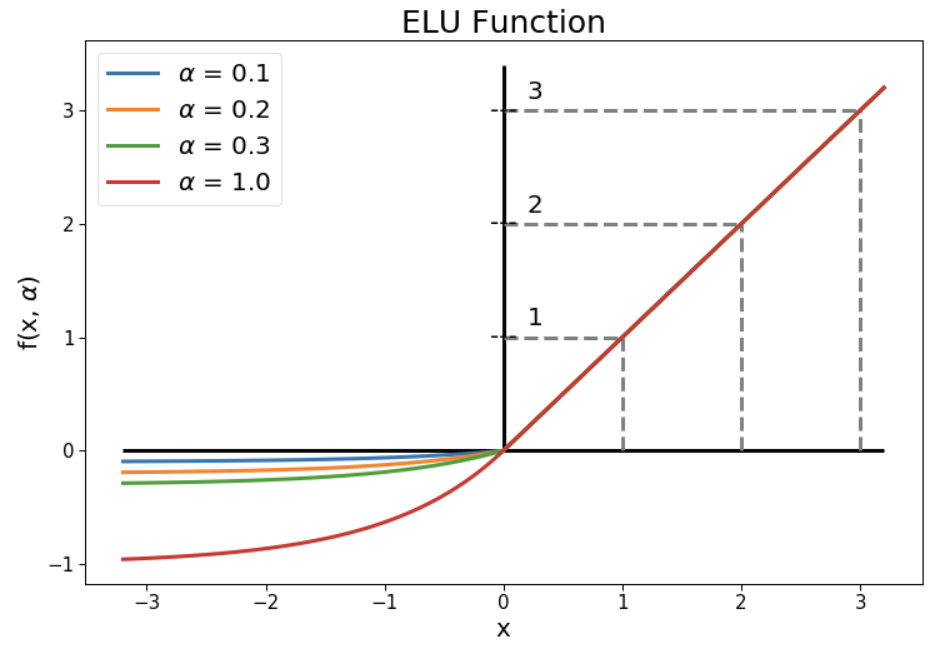

In [ ]:
class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.ELU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

In [ ]:
class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.ELU(alpha=0.1) # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

#### GELU

GELU는 Gaussian Error Linear Unit의 줄임말로 원본입력에 원본입력을 Gaussian distribution의 CDF를 통과한 값과 곱해주는 함수이다. 이를 통해 x가 다른 입력과 비교했을 때 얼마나 큰지로 gating이 되는 효과를 얻는다. 또한 bounded below가 되어있어 gradient vanishing에서 자유롭다. ReLU, ELU와 GELU를 비교했을 때 GELU가 일관적으로 성능이 더 좋다는 실험 결과가 있다. 최근 NLP (BERT 등)와 Vision 분야(Vision Transfoemer 등)가 점점 더 모델이 커지고 깊어지면서 GELU activation을 많이 사용하고 있다.

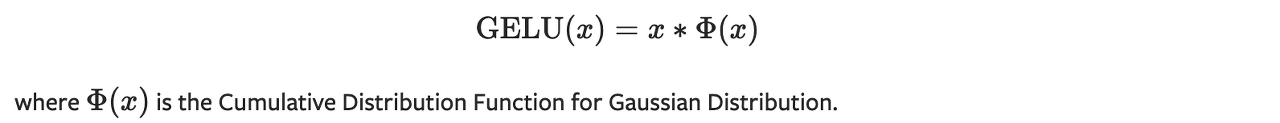

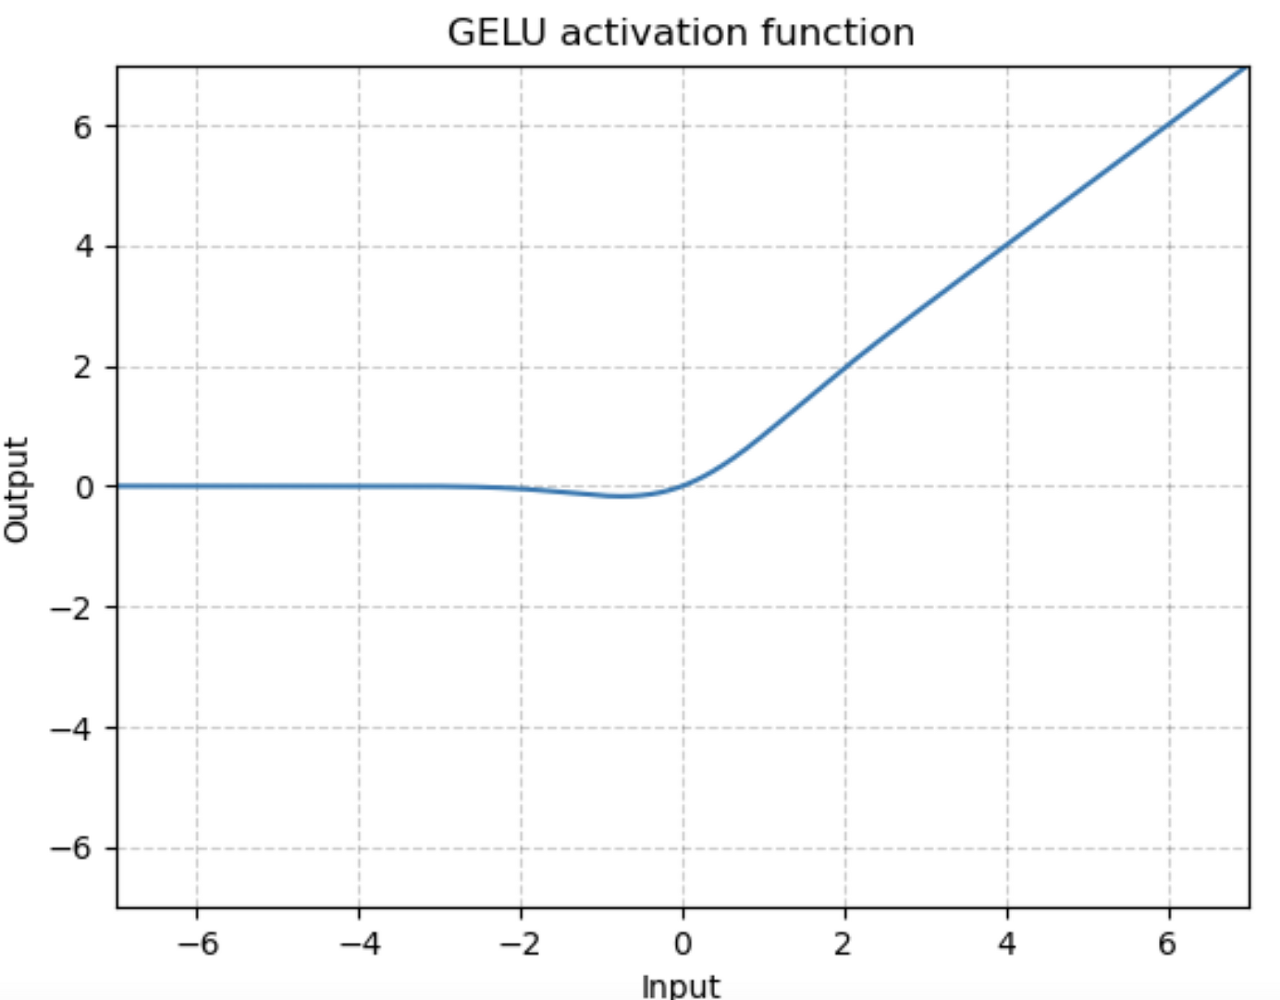

In [ ]:
class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.GELU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

#### CELU

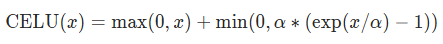

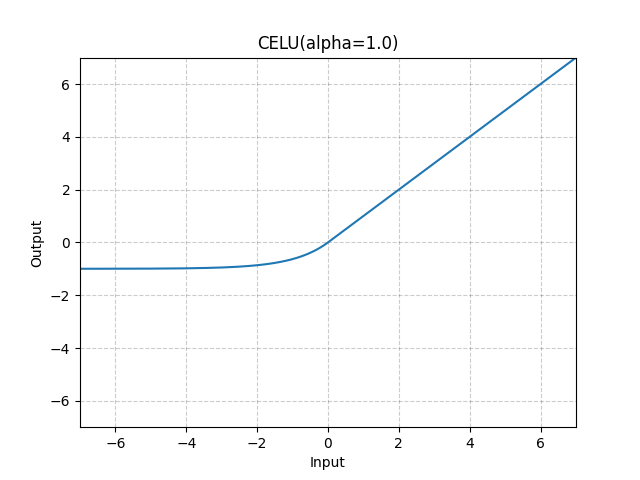

In [ ]:
class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.CELU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

#### SELU

ELU 활성화 함수의 변종으로 완전 연결 층만 쌓아서 신경망을 만들고 모든 은닉층이 SELU 활성화 함수를 사용하면 네트워크가 자기 정규화(self-normalized) 된다고 저자는 주장한다. 훈련하는 동안 각 층의 출력이 평균 0과 표준편차 1을 유지하는 경향(그래디언트 소실과 폭주 문제를 막아준다.)을 가지며 다른 활성화 함수보다 뛰어난 성능을 종종 보이지만 자기 정규화가 일어나기 위한 몇가지 조건이 존재한다.

1) 입력 특성이 반드시 표준화(평균 0, 표준편차 1)되어야 한다. \\
2) 모든 은닉층의 가중치는 LeCun 정규분포 초기화로 초기화되어야 한다. \\
3) 네트워크는 일렬로 쌓은 층으로 구성되어야 한다. 순환 신경망이나 스킵 연결과 같은 순차적이지 않은 구조에서 사용하면 자기 정규화되는 것을 보장하지 않는다.


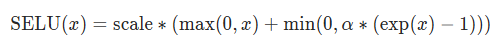

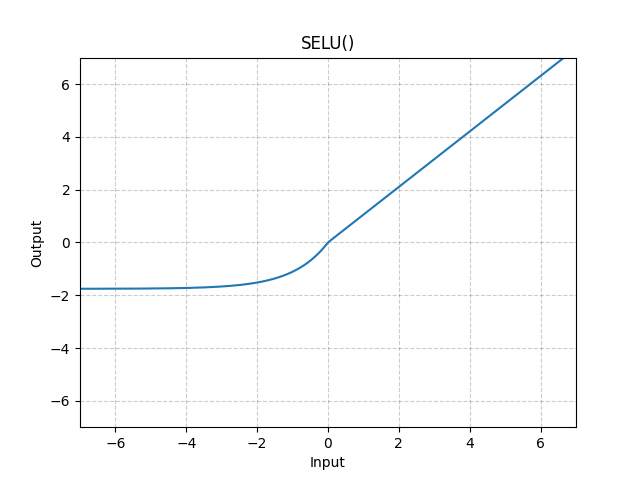

In [ ]:
class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.SELU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

#### Swish (SiLU)

SiLU는 Sigmoid Linear Unit의 줄임말로 원본 입력에 sigmoid를 씌운 값의 곱으로 이루어져있다. 구글이 논문에서 Swish라는 함수로 정의하여서 Swish라고도 부른다. 이 방법 GELU와 마찬가지로 gating을 활용하여 0보다 작은 곳에서 0이 되지 않게 하면서도 bounded below를 한 함수이다.

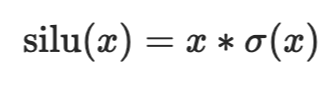

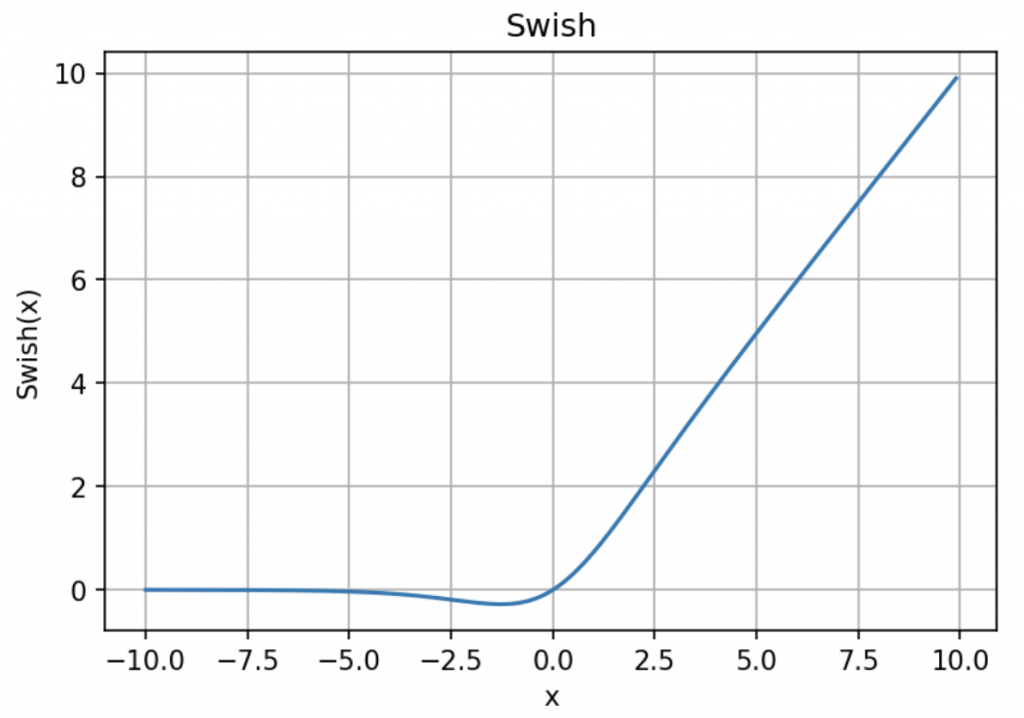

In [ ]:
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.SiLU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

1) Unboundedness : sigmoid나 tanh 함수들과는 달리, swish는 위로 경계가 없기 때문에 0 근처 값을 가진 gradient를 유용하게 사용 가능하다. 이러한 특징은 학습하는 동안 0 근처에서 gradient 값이 포화되는 것을 막는다.

2) Smoothness of the curve : Smooth는 일반화와 최적화에 중요한 역할을 한다. Relu와 달리 Swish는 Smooth 함수이므로, 초기값과 learing rate에 덜 민감하다.

3) Bounded Below :  Swish 함수는 아래로는 하한이 있기 때문에 강한 regularization 효과를 줄 수 있다. (Relu , Softplus) Swish 함수는 비단 조성 때문에 작은 음수 입력에도 음수 결과를 만들 수 있다. swish의 비단 조성은 표현력을 증가시키고 gradient flow를 개선시킨다. 이는 많은 사전 활성화 함수가 이 범위에 속하는 것을 고려할 때 중요하다고 한다.

"selu의 장점 중 눈에 돋보이는 건 internal normalization. swish 같은 경우에는 위의 글에서는 음수 값에도 영향을 줄 수 있고 하한은 있지만 상한이 없다는 장점을 가지고 있는데 이는 selu도 마찬가지이므로 selu가 더 좋다고 판단"

출처: https://medium.com/techspace-usict/swish-a-self-gated-activation-function-3b7e551dacb5

#### Mish

Mish함수는 다음과 같은 식으로 gating을 하는 함수이다. GELU나 Swish와 마찬가지로 unbounded above, bounded below의 형태를 가지고 있다. ReLU나 Swish보다 훨씬 손실환경을 더 부드럽게 만든다고 논문의 저자는 소개한다. 이를 통해 더 안정적인 학습이 가능하다.

**값의 범위: [-0.31, ∞]

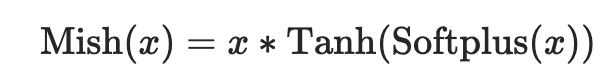

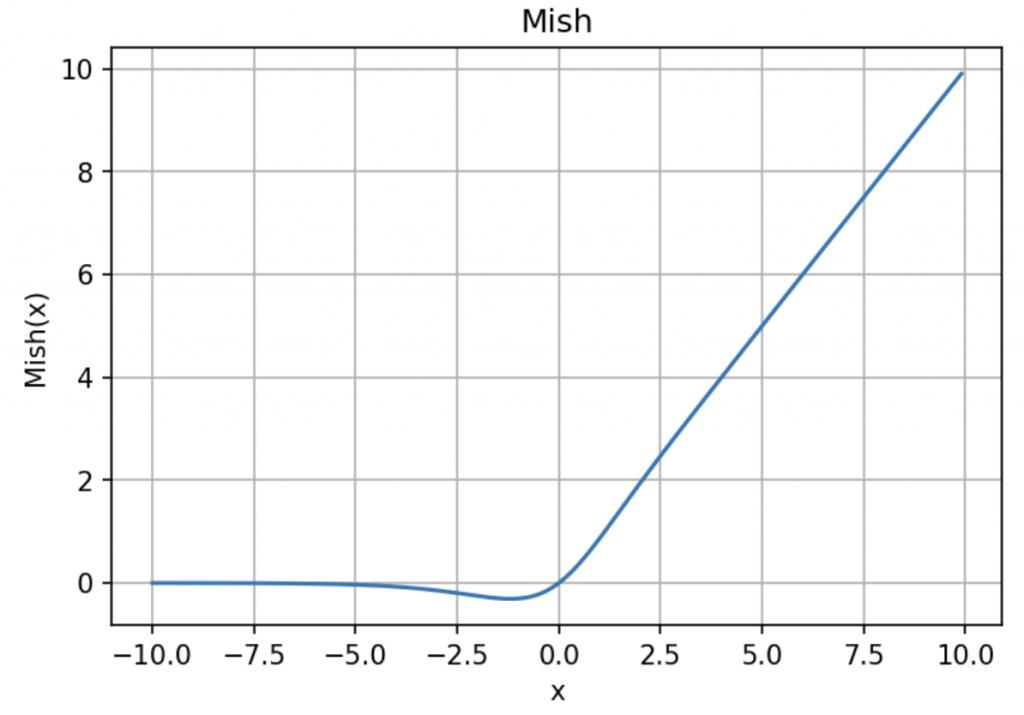

In [ ]:
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Mish() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
x = torch.randn(16, 128)
model = DenseBlock(in_dim=128, out_dim=1)
y = model(x)
print(y)
print(y.shape)

#### RReLU

훈련하는 도중 α 값을 무작위로 선택하여 학습한다.

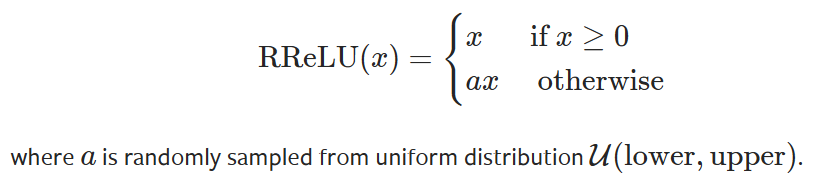

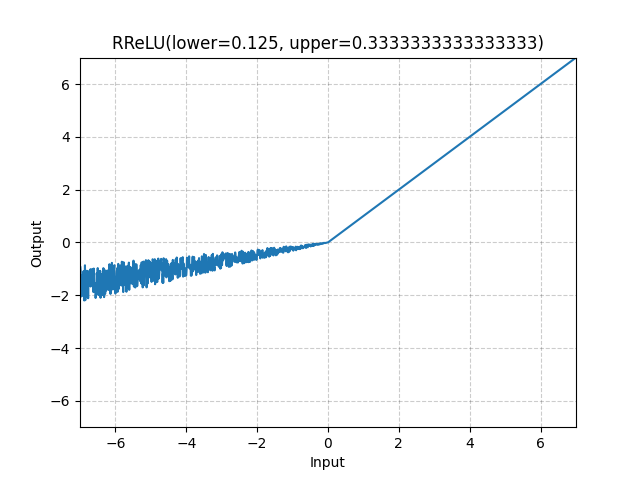

#### Activation Function Comparison

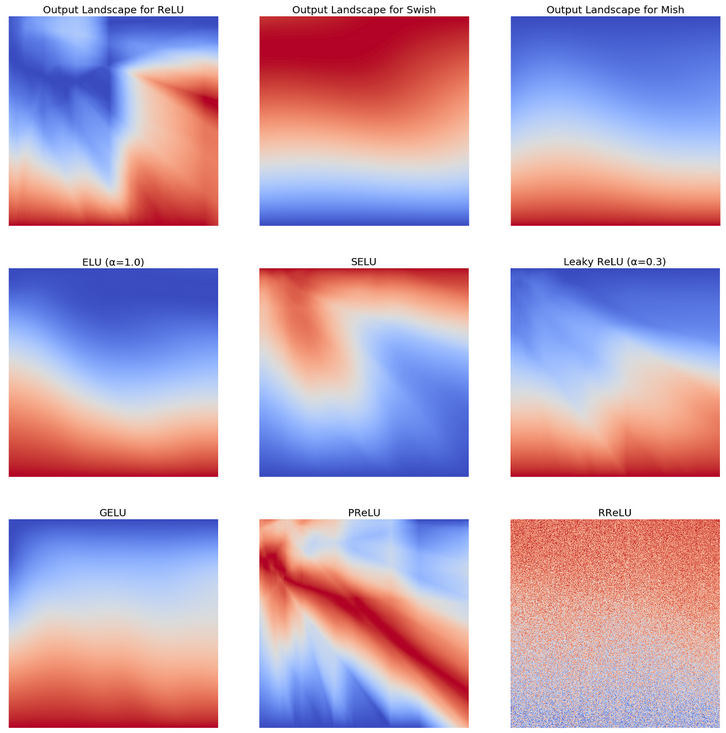

### Normalization

#### STL10 데이터셋

사용할 데이터 셋은 STL10 입니다. STL10은 Image Classification 의 벤치마크로 10개의 라벨을 가진 데이터 셋 입니다. torchvisvion 에서는 5000개의 train 데이터와 8000개의 test 로 구성되어 있으며, datasets.STL10 매소드로 다운받을 수 있습니다.

In [ ]:
# loading training data
from torchvision import datasets
import torchvision.transforms as transforms
import os

path2data = '/data'

# if not exists the path, make the path
if not os.path.exists(path2data):
    os.mkdir(path2data)

data_transformer = transforms.Compose([transforms.ToTensor()])
train_ds = datasets.STL10(path2data, split='train', download='True', transform=data_transformer)

print(train_ds.data.shape)

#### 평균과 표준편차 계산

train_ds의 평균과 표준편차를 계산합니다.

In [ ]:
# calculate the mean and standard deviation of train_ds
import numpy as np

meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x,_ in train_ds]
stdRGB = [np.std(x.numpy(), axis=(1,2)) for x,_ in train_ds]

meanR = np.mean([m[0] for m in meanRGB])
meanG = np.mean([m[1] for m in meanRGB])
meanB = np.mean([m[2] for m in meanRGB])

stdR = np.mean([s[0] for s in stdRGB])
stdG = np.mean([s[1] for s in stdRGB])
stdB = np.mean([s[2] for s in stdRGB])

print(meanR, meanG, meanB)
print(stdR, stdG, stdB)

In [ ]:
def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1,2,0))

    plt.imshow(npimg_tr)
    if y is not None:
        plt.title('labels: ' + str(y))

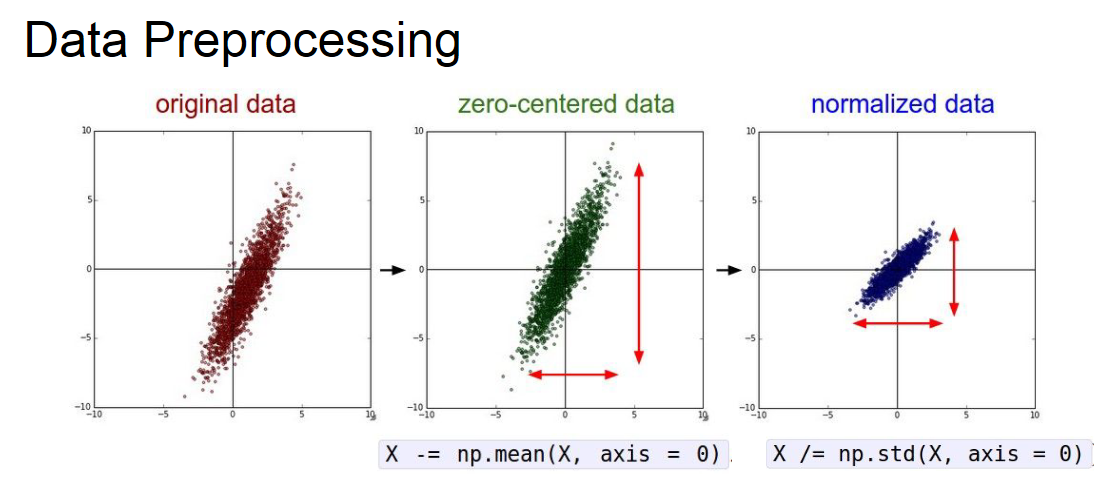

#### Normalize 전

In [ ]:
import torchvision
import matplotlib.pyplot as plt

np.random.seed(0)

# pick random samples
grid_size = 4
rnd_inds = np.random.randint(0, len(train_ds), grid_size)
print('image indices:', rnd_inds)

# create a grid from the sample images
x_grid = [train_ds[i][0] for i in rnd_inds]
y_grid = [train_ds[i][1] for i in rnd_inds]

x_grid = torchvision.utils.make_grid(x_grid, nrow=4, padding=1)
print(x_grid.shape)

plt.figure(figsize=(10.0, 10.0))
show(x_grid, y_grid)

#### Normalize 후

In [ ]:
train_transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([meanR, meanG, meanB], [stdR, stdG, stdB])
])

train_ds.transform = train_transformer

In [ ]:
import torchvision

np.random.seed(0)
torch.manual_seed(0)

grid_size = 4
rnd_inds = np.random.randint(0, len(train_ds), grid_size)
print('image indices:', rnd_inds)

x_grid = [train_ds[i][0] for i in rnd_inds]
y_grid = [train_ds[i][1] for i in rnd_inds]

x_grid = torchvision.utils.make_grid(x_grid, nrow=4, padding=2)
print(x_grid.shape)

plt.figure(figsize=(10,10))
show(x_grid, y_grid)

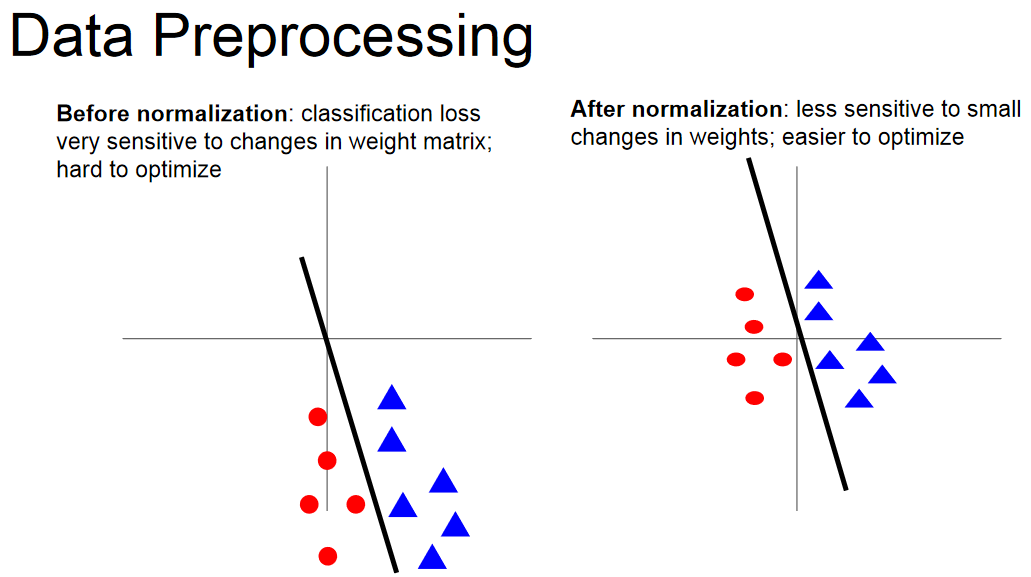

### Weight Initialization

실험을 위해 난수를 생성해보도록 하겠습니다.

#### Small random numbers

In [ ]:
W = 0.01 * np.random.randn(16, 512)
print(W)

In [ ]:
sns.distplot(W)

적당한 크기의 네트워크에서는 잘 동작하겠지만, 네트워크의 깊이가 깊어진다면 문제가 발생할 수 있습니다.

In [ ]:
dims = [4096] * 7
hs = list()
x = np.random.randn(16, dims[0])

for Din, Dout in zip(dims[:-1], dims[1:]):
    W = 0.01 * np.random.randn(Din, Dout)
    x = np.tanh(x.dot(W))
    hs.append(x)

In [ ]:
for h in hs:
    plt.xlim(-1,1)
    sns.histplot(h.flatten())
    plt.show()

In [ ]:
plt.figure(figsize=(10,8))
for h in hs:
    sns.kdeplot(h.flatten())

0.01에서 초기값을 0.05으로 조금 더 높여보도록 하겠습니다.

In [ ]:
dims = [4096] * 7
hs = list()
x = np.random.randn(16, dims[0])

for Din, Dout in zip(dims[:-1], dims[1:]):
    W = 0.05 * np.random.randn(Din, Dout)
    x = np.tanh(x.dot(W))
    hs.append(x)

In [ ]:
for h in hs:
    plt.xlim(-1,1)
    sns.histplot(h.flatten())
    plt.show()

Local gradients all zero, no learning =(

#### Xavier Initilaization

In [ ]:
dims = [4096] * 7
hs = list()
x = np.random.randn(16, dims[0])

for Din, Dout in zip(dims[:-1], dims[1:]):
    W = np.random.randn(Din, Dout) / np.sqrt(Din) # Xavier Initialization
    x = np.tanh(x.dot(W))
    hs.append(x)

In [ ]:
for h in hs:
    plt.xlim(-1,1)
    sns.histplot(h.flatten())
    plt.show()

“Just right”: Activations are nicely scaled for all layers!

그렇다면 ReLU에서는 어떻게 될까요?

In [ ]:
dims = [4096] * 7
hs = list()
x = np.random.randn(16, dims[0])

for Din, Dout in zip(dims[:-1], dims[1:]):
    W = np.random.randn(Din, Dout) / np.sqrt(Din) # Xavier Initialization
    x = np.maximum(0, x.dot(W))
    hs.append(x)

In [ ]:
for h in hs:
    plt.xlim(-1,1)
    sns.histplot(h.flatten())
    plt.show()

Activations collapse to zero again, no learning =(

#### Kaiming / MSRA Initialization

In [ ]:
dims = [4096] * 7
hs = list()
x = np.random.randn(16, dims[0])

for Din, Dout in zip(dims[:-1], dims[1:]):
    W = np.random.randn(Din, Dout) * np.sqrt(2/Din) # Xavier Initialization
    x = np.maximum(0, x.dot(W))
    hs.append(x)

In [ ]:
for h in hs:
    plt.xlim(-1,1)
    sns.histplot(h.flatten())
    plt.show()

https://www.deeplearning.ai/ai-notes/initialization/index.html

### Data Augmentation

Data augmentation는 갖고 있는 데이터셋을 여러 가지 방법으로 augment하여 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법입니다.

실습을 진행하기 위해서 이번에도 이미지 예시를 하나 다운받아 보겠습니다.
실습 이미지가 더 돋보이도록 하기 위해서 색감이 화려한 이미지를 찾았고, 그래서 애니메이션 이미지를 활용해보고자 합니다.

In [ ]:
import os
from PIL import Image

# 다운받을 이미지 url
url = "https://hips.hearstapps.com/esq.h-cdn.co/assets/cm/15/06/1280x1280/54cfa88f4afb2_-_esq-simpsons-de.jpg?resize=1200:*"

# curl 요청
os.system("curl " + url + " > test3.jpg")

# 저장 된 이미지 확인
img = Image.open("test3.jpg")
img

추후 변형된 이미지들을 더 잘 확인할 수 있도록 미리 plot 함수를 짜놓도록 하겠습니다.

In [ ]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open("test3.jpg")
torch.manual_seed(0)

def plot(imgs, with_orig=True, row_title=None, size=15, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False, figsize=(size, size))
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

#### Tochvision

##### Padding

In [ ]:
padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

##### Resize

In [ ]:
resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_imgs)

##### CenterCrop

In [ ]:
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (100, 200, 300, orig_img.size)]
plot(center_crops)

##### Grayscale

In [ ]:
gray_img = T.Grayscale()(orig_img)
plot([gray_img], size=7, cmap='gray')

##### ColorJitter

In [ ]:
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

##### Random Rotation

In [ ]:
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

##### Random Crop

In [ ]:
cropper = T.RandomCrop(size=(800, 800))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

##### Random Resize Crop

In [ ]:
resize_cropper = T.RandomResizedCrop(size=(800, 800))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

##### Random Horizontal Flip

In [ ]:
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

##### Random Vertical Flip

In [ ]:
vflipper = T.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### Albumentation package

albumentation은 이미지 augmentation을 쉽고 효율적으로 할 수 있도록 만든 라이브러리 입니다. \\
딥러닝 기반의 이미지 어플리케이션을 개발할 때에는 제한된 학습 이미지로 인하여 augmentation은 필수적으로 사용하고 있습니다. Pytorch를 기준으로 예시를 들면 torchvision이라는 패키지를 이용하여 다양한 transform을 할 수 있도록 지원하고 있습니다. \\
albumentation은 torchvision에서 지원하는 transform 보다 더 효율적이면서도 다양한 augmentation 기법을 지원합니다.

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread('test3.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
# 이미지 배열을 입력받아 5개 출력하는 함수
def show_images(images, labels):
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 8))
    for i in range(5):
        axs[i].imshow(images[i])
        axs[i].set_title(labels[i])

# 원본 이미지를 입력받아 4개의 augmentation 적용하여 시각화
def aug_apply(image, label, aug):
    image_list = [image]
    label_list = ['origin']

    for i in range(4):
        aug_image = aug(image=image)['image']
        image_list.append(aug_image)
        label_list.append(label)

    show_images(image_list, label_list)

In [ ]:
import albumentations as A

# 좌우 반전
aug_horizontal = A.HorizontalFlip(p=0.5)
# 상하 반전
aug_vertical = A.VerticalFlip(p=0.5)
# -90 ~ 90도 사이로 돌림, 남은 공간은 주변 환경으로 채움 (cv2.BORDER_CONSTAN, cv2.BORDER_REFLECT, cv2.BORDER_REFLECT_101, cv2.BORDER_WRAP)
aug_rotate = A.Rotate(limit=90, p=1, border_mode=cv2.BORDER_REPLICATE)
# 원본사이즈를 변경 하면서 90, 180, 270, 360도 돌림
aug_random_rotate = A.RandomRotate90(p=1)

aug_apply(image=image, label='Horizontal', aug=aug_horizontal)
aug_apply(image=image, label='Vertical', aug=aug_vertical)
aug_apply(image=image, label='Rotate', aug=aug_rotate)
aug_apply(image=image, label='RandomRotate', aug=aug_random_rotate)

In [ ]:
#여러개 동시에 적용 (Compose 자체에도 확률을 적용할 수 있음)
aug_multi = A.Compose([
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5)
], p=1)

aug_apply(image=image, label='Comsose', aug=aug_multi)

In [ ]:
# 색상 채도 명도 변경, default(hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20))
aug_hsv = A.HueSaturationValue(p=1)
#RGB 값 각각 범위내 임의로 변경 default(r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20))
aug_rgb = A.RGBShift(p=1)
#RGB Channel을 랜덤하게 섞음
aug_rgb_shuffle = A.ChannelShuffle(p=1)

aug_apply(image=image, label='HueSaturationValue', aug=aug_hsv)
aug_apply(image=image, label='RGBShift', aug=aug_rgb)
aug_apply(image=image, label='RGBShuffle', aug=aug_rgb_shuffle)

In [ ]:
import os
from PIL import Image

# 다운받을 이미지 url
url = "https://raw.githubusercontent.com/gaussian37/gaussian37.github.io/master/assets/img/dl/pytorch/albumentation/city_image.png"
url2 = "https://raw.githubusercontent.com/gaussian37/gaussian37.github.io/master/assets/img/dl/pytorch/albumentation/city_mask.png"

# curl 요청
os.system("curl " + url + " > image.jpg")
os.system("curl " + url2 + " > mask.jpg")

# 저장 된 이미지 확인
img = Image.open("image.jpg")
img

In [ ]:
img = Image.open("mask.jpg")
img

In [ ]:
import albumentations as A
import cv2

image = cv2.imread("image.jpg")
mask = cv2.imread("mask.jpg")

height = 300
width = 300

# Declare an augmentation pipeline
transform = A.Compose([
    A.Resize(height=height, width=width),
    A.RandomResizedCrop(height=height, width=width, scale=(0.3, 1.0)),
])

augmentations = transform(image=image, mask=mask)
augmentation_img = augmentations["image"]
augmentation_mask = augmentations["mask"]

In [ ]:
plt.imshow(augmentation_img)
plt.show()

In [ ]:
plt.imshow(augmentation_mask)
plt.show()

In [ ]:
# Declare an augmentation pipeline
transform = A.Compose([
    A.Resize(height=height, width=width),
    A.Rotate(limit=90, p=1)
])

augmentations = transform(image=image, mask=mask)
augmentation_img = augmentations["image"]
augmentation_mask = augmentations["mask"]

In [ ]:
plt.imshow(augmentation_img)
plt.show()

In [ ]:
plt.imshow(augmentation_mask)
plt.show()

### 이전 실습 코드 재확인

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.RandomVerticalFlip(p=0.3),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.ToTensor(),
])

In [ ]:
# 공개 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

In [ ]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

In [ ]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# 새로운 CNN모델을 정의합니다.
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.Mish(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.Mish(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.Mish(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.Mish(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

model = CNN().to(device)
print(model)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")